<a href="https://colab.research.google.com/github/Stephensingletary/Image-Classification-For-Cross-Analysis-of-Chest-X-Ray/blob/Patrick/Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow import keras
import os
from glob import glob


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
img_folder = "/content/drive/MyDrive/xray_images_full_dataset/image_with_label"
df = pd.read_csv("/content/drive/MyDrive/xray_images_full_dataset/labels.csv")
df.head()

,Image Index,target
0,00000001_000.png,1
1,00000001_001.png,1
2,00000001_002.png,1
3,00000002_000.png,0
4,00000003_000.png,1


In [ ]:
#img_path = glob('/content/drive/MyDrive/xray_images_full_dataset/images*/images*/*.png')

In [1]:
import pickle
# Load the variable from a pickle file
#with open("glob_obj.pkl", "rb") as f:
   mg_path = pickle.load(open("glob_obj.pkl","rb"))

IndentationError: unexpected indent (<ipython-input-1-bdf0447fc432>, line 4)

In [30]:
len(img_path)

NameError: name 'img_path' is not defined

In [31]:
full_img_paths = {os.path.basename(x): x for x in img_path}
df['full_path'] = df['Image Index'].map(full_img_paths.get)

NameError: name 'img_path' is not defined

In [7]:
df = df.dropna(axis=0)
df["target"] = df["target"].apply(lambda x: "y" if x==1 else "n")

<ipython-input-7-6dfd1ea68eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["target"].apply(lambda x: "y" if x==1 else "n")


<Axes: xlabel='target'>

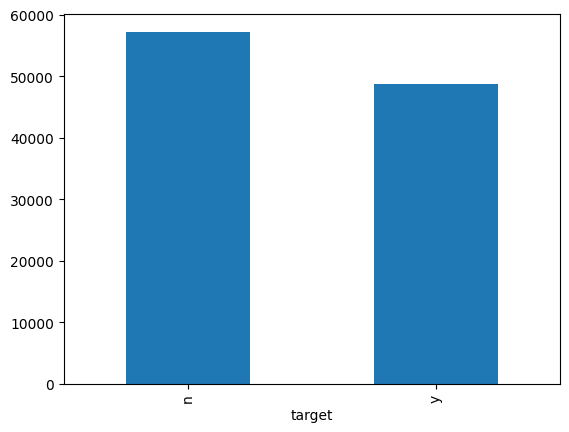

In [8]:
df.target.value_counts().plot(kind="bar")

In [9]:
df = df.iloc[:5000]

In [10]:
len(df)

5000

In [11]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1770)

# quick check to see that the training and test set were split properly
print('training set - # of observations: ', len(train_set))
print('test set - # of observations): ', len(test_set))
print('prior, full data set - # of observations): ', len(df))

training set - # of observations:  4000
test set - # of observations):  1000
prior, full data set - # of observations):  5000


In [12]:
data_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)



In [13]:
train_gen = data_gen.flow_from_dataframe(train_set,x_col="full_path",y_col="target",target_size=(64,64),class_mode="binary",seed=43, batch_size = 128)
test_gen = data_gen.flow_from_dataframe(test_set,x_col="full_path",y_col="target",target_size=(64,64),class_mode="binary",seed=43, batch_size = 128)

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [17]:
# Define the model
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# compile model, run summary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 8)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 16)       

In [18]:
model.fit(train_gen, validation_data=test_gen, epochs=10, verbose=1,shuffle=True)

NameError: name 'train_gen' is not defined

In [10]:
import tensorflow as tf

In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
from keras.applications.vgg16 import VGG16

In [13]:

def new_model():
  #base_model = VGG19(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
  for layer in base_model.layers:
    layer.trainable = False
  model = Sequential([

    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
  ])
  return model


model = new_model()
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=test_gen, epochs=10, verbose=1,shuffle=True)



NameError: name 'train_gen' is not defined